<a href="https://colab.research.google.com/github/pairuoyefe/My-data-Project/blob/main/animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [47]:
Data = '/content/data'
Data = tf.keras.preprocessing.image_dataset_from_directory(Data,batch_size=32,image_size=(256,256))


Found 903 files belonging to 3 classes.


In [48]:
class_names = Data.class_names
print(class_names)

['Goat', 'Zebra', 'horse']


In [49]:
# Normalize pixel values
Data= Data.map(lambda x,y:(x/255,y))

In [50]:
#shuffle the data

Dataset = Data.shuffle(1000, seed=42)

In [51]:
#calculate the batch no

batch_size = 32
num_images = 903

total_batches = (num_images + batch_size - 1) // batch_size
print(total_batches)

29


In [52]:
#split the data into train, val, test
total_batches = tf.data.experimental.cardinality(Dataset).numpy()
train_size = int(0.7 * len(Dataset))
val_size = int(0.15 * len(Dataset))
test_size = len(Dataset) - train_size - val_size

train_dataset = Dataset.take(train_size)
val_dataset = Dataset.skip(train_size).take(val_size)
test_dataset = Dataset.skip(train_size + val_size)

In [53]:
num_classes = len(class_names)

model = keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [54]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.4049 - loss: 7.3694 - val_accuracy: 0.7188 - val_loss: 0.6963
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7370 - loss: 0.6133 - val_accuracy: 0.7812 - val_loss: 0.6639
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8237 - loss: 0.4541 - val_accuracy: 0.9029 - val_loss: 0.2266
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9084 - loss: 0.2514 - val_accuracy: 0.9297 - val_loss: 0.1665
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9465 - loss: 0.1681 - val_accuracy: 0.9922 - val_loss: 0.0562
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9784 - loss: 0.0949 - val_accuracy: 0.9903 - val_loss: 0.0306
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9832 - loss: 0.0394 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9933 - loss: 0.0315 - val_accuracy: 1.0000 - 

In [56]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"\nTest accuracy: {test_acc:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9923 - loss: 0.0200

Test accuracy: 0.99


In [57]:
import os

image_folder = "/content/test"
print("Files in folder:", os.listdir(image_folder))

Files in folder: ['image (5).jpeg', 'image (4).jpeg', 'image (3).jpeg']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


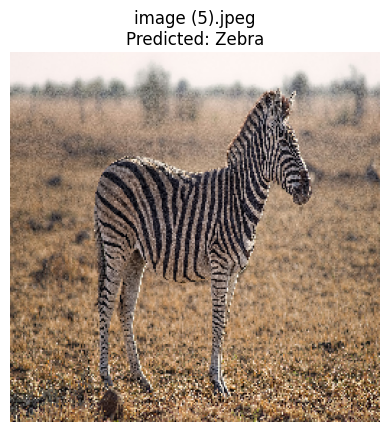

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


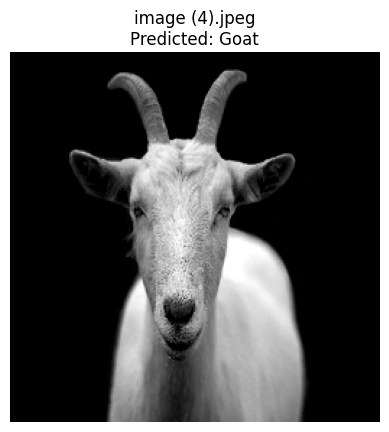

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


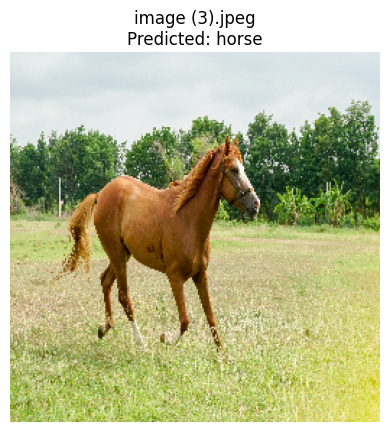

In [58]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Loop through each image in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Only process image files
        img_path = os.path.join(image_folder, filename)

        # Load and resize image to match model input
        img = image.load_img(img_path, target_size=(256, 256))  # Resize to (256, 256)
        img_array = image.img_to_array(img)                     # Convert to numpy array
        img_array = img_array / 255.0                           # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension

        # Make prediction
        prediction = model.predict(img_array)
        predicted_index = np.argmax(prediction)
        predicted_class = class_names[predicted_index]

        # Display result
        plt.imshow(img)
        plt.title(f"{filename}\nPredicted: {predicted_class}")
        plt.axis('off')
        plt.show()

In [59]:
model.save('imagemodel.h5')